In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark SQL basic example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pyspark.sql.functions import col, countDistinct, trim, length, to_date, year, month, when
from pyspark.sql import functions as F 

In [3]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Serif'
our_colors = ["#1f487e","#1d3461", "#376996", "#6290c8", "#829cbc"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=our_colors) #for the piechart


In [4]:
df_lighter_books = spark.read.json("lighter_books.json")
df_lighter_authors = spark.read.json("lighter_authors.json")

In [5]:
df_lighter_books.createOrReplaceTempView("lighter_books")
df_lighter_authors.createOrReplaceTempView("lighter_authors")

In [6]:
df_lighter_books = df_lighter_books.dropDuplicates()
df_lighter_authors = df_lighter_authors.dropDuplicates()

# [RQ1] Exploratory Data Analysis (EDA) 
We have two main files in which our data are saved, "lighter_authors.json" and "lighter_books.json". 
- To begin the exploratory analysis we start by looking at the first few rows of our datasets. We created the count_columns_type function in order to see how many columns in the dataset contain numeric, categorical, or other type of variables. We also printed out how many rows each dataset has. 
Books_lighter has 26 columns and a total of 7027431 rows while Authors_lighter has 12 columns and 351767 rows. It is also useful to print the list with all the columns of the datasets.

In [7]:
# Function to obtain the type of the columns
def count_columns_type(data):
    categorial = 0
    numeric = 0
    other = 0
    from pyspark.sql.types import StringType, DoubleType, LongType
    for col in data.columns:
        c_type = data.schema[col].dataType
        #print(c_type)
        if isinstance(c_type, StringType):
            categorial += 1
            
        elif isinstance(c_type, LongType) or isinstance(c_type,DoubleType):
            numeric += 1
        else:
            other += 1
    print("The number of categorial columns is: ", categorial)
    print("The number of numeric columns is: ", numeric)
    print("The number of other types of columns is: ", other)

In [8]:
books_5 = spark.sql("SELECT (*) FROM lighter_books LIMIT 5").toPandas()
display(books_5)
print("The total number of columns is:", len(df_lighter_books.columns))
count_columns_type(df_lighter_books)
count_books = spark.sql("SELECT COUNT(*) FROM lighter_books").toPandas()
print("The number of rows in the books file is:" , count_books.iloc[0,0])

asin  author_id   author_name  \
0         1077326  J.K. Rowling   
1         1077326  J.K. Rowling   
2         1077326  J.K. Rowling   
3         1077326  J.K. Rowling   
4         1077326  J.K. Rowling   

                                             authors  average_rating  \
0  [(1077326, J.K. Rowling, ), (2927, Mary GrandP...            4.50   
1  [(1077326, J.K. Rowling, ), (2927, Mary GrandP...            4.48   
2                                               None            4.43   
3  [(1077326, J.K. Rowling, ), (2927, Mary GrandP...            4.57   
4  [(1077326, J.K. Rowling, ), (2927, Mary GrandP...            4.56   

                                         description  \
0  There is a door at the end of a silent corrido...   
1  Harry Potter's life is miserable. His parents ...   
2  The Dursleys were so mean and hideous that sum...   
3  For twelve long years, the dread fortress of A...   
4  Harry Potter is midway through his training as...   

                        edition_information                 format  id  \
0                                US Edition              Paperback   2   
1                           Library Edition              Hardcover   3   
2                                                        Hardcover   4   
3                                            Mass Market Paperback   5   
4  First Scholastic Trade Paperback Edition              Paperback   6   

                                           image_url  ...        publisher  \
0  https://i.gr-assets.com/images/S/compressed.ph...  ...  Scholastic Inc.   
1  https://i.gr-assets.com/images/S/compressed.ph...  ...   Scholastic Inc   
2  https://i.gr-assets.com/images/S/compressed.ph...  ...       Scholastic   
3  https://i.gr-assets.com/images/S/compressed.ph...  ...  Scholastic Inc.   
4  https://i.gr-assets.com/images/S/compressed.ph...  ...       Scholastic   

                                         rating_dist ratings_count  series_id  \
0  5:1674064|4:664833|3:231195|2:41699|1:16215|to...       2628006      45175   
1  5:4801606|4:1681521|3:623286|2:145898|1:125040...       7377351      45175   
2  5:1690166|4:781011|3:313727|2:54687|1:15453|to...       2855044      45175   
3  5:1994597|4:696545|3:212678|2:28915|1:13959|to...       2946694      45175   
4  5:1808039|4:663849|3:193604|2:27759|1:12425|to...       2705676      45175   

    series_name series_position  \
0  Harry Potter               5   
1  Harry Potter               1   
2  Harry Potter               2   
3  Harry Potter               3   
4  Harry Potter               4   

                                             shelves text_reviews_count  \
0  [(324191, to-read), (52675, currently-reading)...              44716   
1  [(63540, fantasy), (57260, favorites), (20889,...             116930   
2  [(282341, to-read), (67110, currently-reading)...              55286   
3  [(292815, to-read), (52580, fantasy), (49479, ...              58023   
4  [(287086, to-read), (60111, currently-reading)...              48637   

                                               title  work_id  
0  Harry Potter and the Order of the Phoenix (Har...  2809203  
1  Harry Potter and the Sorcerer's Stone (Harry P...  4640799  
2  Harry Potter and the Chamber of Secrets (Harry...  6231171  
3  Harry Potter and the Prisoner of Azkaban (Harr...  2402163  
4  Harry Potter and the Goblet of Fire (Harry Pot...  3046572  

[5 rows x 26 columns]

The total number of columns is: 26
The number of categorial columns is:  17
The number of numeric columns is:  7
The number of other types of columns is:  2
The number of rows in the books file is: 7027431


In [9]:
authors_5 = spark.sql("SELECT (*) FROM lighter_authors LIMIT 5").toPandas()
display(authors_5)
print("The total number of columns is:", len(df_lighter_authors.columns))
count_columns_type(df_lighter_authors)
count_authors = spark.sql("SELECT COUNT(*) FROM lighter_authors").toPandas()
print("The number of rows in the authors file is:" , count_authors.iloc[0,0])

about  average_rating  \
0  Douglas Noël Adams was an English author, comi...            4.19   
1  William McGuire "Bill" Bryson, OBE, FRS was bo...            4.02   
2  Jude Fisher is the pseudonym for <a href="http...            4.53   
3  James Hamilton-Paterson's work has been transl...            3.79   
4  Mark Andrew Watson (born 13 February 1980) is ...            3.60   

                                            book_ids  fans_count  gender  id  \
0  [386162, 13, 8695, 8694, 6091075, 365, 569429,...       19826    male   4   
1  [9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...       16144    male   7   
2  [349254, 15222, 14833682, 15221, 18126815, 152...          60  female  10   
3  [40, 9416484, 12482, 3753106, 26889789, 104764...          72    male  12   
4  [8466327, 15739968, 22756778, 51026133, 260451...         179    male  14   

                                           image_url                     name  \
0  https://images.gr-assets.com/authors/159137433...            Douglas Adams   
1  https://images.gr-assets.com/authors/157859752...              Bill Bryson   
2  https://images.gr-assets.com/authors/141145711...              Jude Fisher   
3  https://images.gr-assets.com/authors/127051738...  James Hamilton-Paterson   
4  https://images.gr-assets.com/authors/133175379...              Mark Watson   

   ratings_count  text_reviews_count  \
0        2862064               62681   
1        1417316               84176   
2          56159                 352   
3           3302                 480   
4           7979                 772   

                                            work_ids  works_count  
0  [3078186, 135328, 1877624, 74123, 3078120, 104...          106  
1  [613469, 2305997, 940892, 2611786, 7800569, 31...           75  
2  [17150, 808427, 20487307, 90550, 25460625, 171...           14  
3  [4417, 14300808, 14780, 3796968, 44703121, 103...           45  
4  [13330815, 19109351, 42306244, 72694240, 26291...           61

The total number of columns is: 12
The number of categorial columns is:  4
The number of numeric columns is:  6
The number of other types of columns is:  2
The number of rows in the authors file is: 351767


In [10]:
df_lighter_books.columns

['asin',
 'author_id',
 'author_name',
 'authors',
 'average_rating',
 'description',
 'edition_information',
 'format',
 'id',
 'image_url',
 'isbn',
 'isbn13',
 'language',
 'num_pages',
 'original_publication_date',
 'publication_date',
 'publisher',
 'rating_dist',
 'ratings_count',
 'series_id',
 'series_name',
 'series_position',
 'shelves',
 'text_reviews_count',
 'title',
 'work_id']

In [11]:
df_lighter_authors.columns

['about',
 'average_rating',
 'book_ids',
 'fans_count',
 'gender',
 'id',
 'image_url',
 'name',
 'ratings_count',
 'text_reviews_count',
 'work_ids',
 'works_count']

- For numerical variables, statistics such as count, mean, standard deviation, minimum value, and maximum value can be obtained through the describe() function.
- For categorical variables, frequency tables can be constructed in which the absolute frequency of character modes can be seen. We decided to show them for book format and publisher. The most commonly used formats are Paperback, Hardcover ,ebook, Audio CD and Kindle Edition while the most popular publishers are Book on Demand Ltd , Createspace Independent Publishing Platform, Smashwords Edition Turtleback Books and Books LLC, Wiki Series.
- For the author dataset we decided to make a barplot for the gender of the authors, we changed the y-axis to logarithmic scale because it was not possible to see graphically the presence of even genders other than male and female.

In [12]:
# Descriptive statistics for numeric variables of books
statistics_num_var_book = df_lighter_books.select("average_rating", "edition_information", "ratings_count", "text_reviews_count").describe().toPandas()
statistics_num_var_book #6 minutes to run

summary      average_rating    edition_information       ratings_count  \
0   count             7027431                7027431             7027431   
1    mean  3.3061879156123717  4.2425113324187964E11  19458.609666035853   
2  stddev  1.4357340879502618   1.802437181368138E13  160900.76215715022   
3     min                 0.0                                          0   
4     max                 5.0                      １             7400639   

  text_reviews_count  
0            7027431  
1  641.7257807298286  
2  4169.806199983709  
3                  0  
4             174524

In [13]:
# Descriptive statistics for numeric variables of authors
statistics_num_var_authors = df_lighter_authors.select("average_rating", "fans_count", "ratings_count", "works_count").describe().toPandas()
statistics_num_var_authors #10 sec to run

summary      average_rating          fans_count      ratings_count  \
0   count              351767              351767             351767   
1    mean  3.6511943132812488  111.61573143586521  4770.586308550831   
2  stddev  1.2114816423862007  2661.0181388659653  97693.95378788895   
3     min               -31.0                 -33                -41   
4     max                 5.0              766035           27003752   

          works_count  
0              351767  
1  25.937137366495435  
2  3066.0828516236847  
3                   0  
4             1775176

In [7]:
df_lighter_books = df_lighter_books.filter(trim(col("format")) != "")
df_lighter_books = df_lighter_books.filter(trim(col("publisher")) != "")
df_lighter_books = df_lighter_books.dropna(subset=["format","publisher"])
df_lighter_books.createOrReplaceTempView("lighter_books")

In [15]:
# For categorical variables we can make frequency tables for example abot the format of the books
formats = spark.sql("SELECT format, COUNT(*) FROM lighter_books GROUP BY format ORDER BY COUNT(*) DESC").toPandas()
# The same can be done for the publisher
publishers = spark.sql("SELECT publisher, COUNT(*) FROM lighter_books GROUP BY publisher ORDER BY COUNT(*) DESC").toPandas()
#10 minutes to run

In [16]:
formats.head(5)

format  count(1)
0       Paperback   2177540
1       Hardcover    952597
2           ebook    868525
3        Audio CD    117705
4  Kindle Edition    109497

In [17]:
publishers.head(5)

publisher  count(1)
0                          Book on Demand Ltd.    108860
1  Createspace Independent Publishing Platform     89302
2                           Smashwords Edition     79087
3                             Turtleback Books     58453
4                       Books LLC, Wiki Series     56899

In [8]:
# About the authors we can do a plot to see the distribution of the gender
df_lighter_authors = df_lighter_authors.filter(trim(col("gender")) != "")
df_lighter_authors = df_lighter_authors.dropna(subset=["gender"])
df_lighter_authors = df_lighter_authors.withColumn("gender_standard", when(col("gender").isin("non-binary", "Nonbinary", "Non-binary", "nonbinary"), "Non-binary").otherwise(col("gender")))
df_lighter_authors.createOrReplaceTempView("lighter_authors") #needed again because the standardized gender
gender_authors = spark.sql("SELECT gender_standard, COUNT(*) FROM lighter_authors GROUP BY gender_standard ORDER BY count(*) DESC").toPandas()
gender_authors.head(5)

gender_standard  count(1)
0            male    138179
1          female    109878
2      Non-binary        95
3     genderqueer        28
4         Agender        11

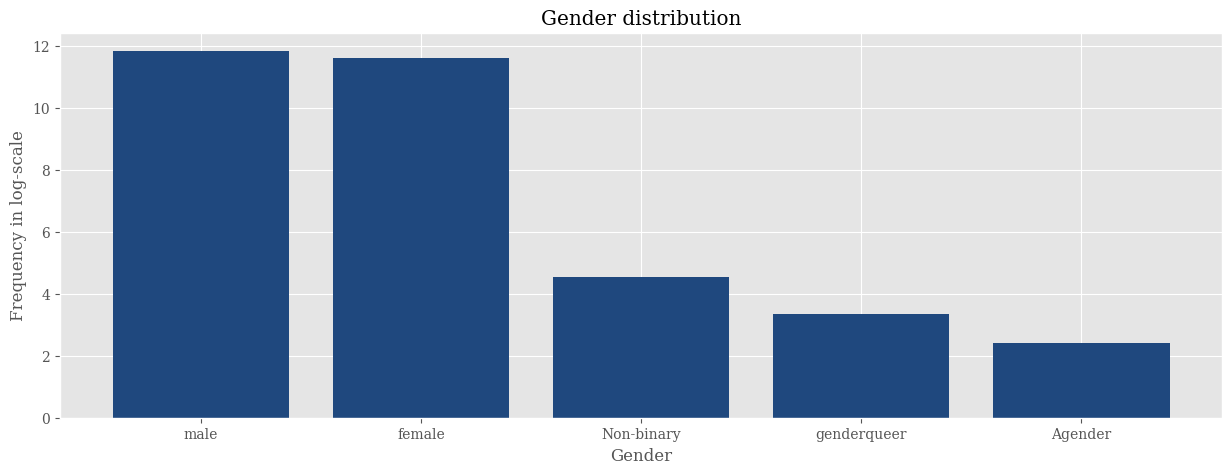

In [19]:
plt.figure(figsize=(15,5))
plt.bar(gender_authors["gender_standard"].head(5),np.log(gender_authors["count(1)"].head(5))) #logaritmic scale to make the differences visible
plt.title('Gender distribution')  
plt.xlabel('Gender')              
plt.ylabel('Frequency in log-scale')  
plt.show()

# [RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:
- Plot the number of books for each author in descending order.

In [9]:
# Cleaning a bit the data
df_lighter_books = df_lighter_books.filter(trim(col("author_name")) != "") # removes rows with empty author_name
df_lighter_books = df_lighter_books.dropna(subset=["author_name"])
# Query to count how many times an author appears
freq_authors = df_lighter_books.groupBy("author_name").count().orderBy("count", ascending=False).toPandas() #5  minutes to run
# We see that some of them are not properly authors like "Anonymous","Unknown","NOT A BOOK" and so we eliminate them
freq_authors = freq_authors.drop([1,2,4,5,7])

In [21]:
freq_authors

author_name  count
0              Jesse Russell  90083
3           Philip M. Parker  27415
6                  Books LLC  18170
8        William Shakespeare  13680
9            Agatha Christie   9834
...                      ...    ...
237093      Γιώργος Παυλίδης      1
237094         Rachel  Wells      1
237095            Yanka Bryl      1
237096        Diana Lawrence      1
237097  Christopher    Scott      1

[237093 rows x 2 columns]

There are 237093 rows in the dataset with the author's name and the number of books written, representing them all together would make the graph unreadable, so we thought of two strategies. The idea is to recreate a stratified sampling, for us each stratum of the population consists of the number of books written and from each stratum we take only one author who precisely represents his stratum. In this way we get 1303 authors. To represent them all we created the function division_data that devides the dataset into n parts and then we made a barplot for each of the n divisions of the data. However, the result we get is not very clear, there are some authors who have so much more than others and then the number of books written goes down to 1.
Our second attempt to make sure that we could get a readable graph but without also excluding those who wrote the data was to make a sample from the stratified sampling already done 

### First attempt: sampling only one author for each value of book count

In [22]:
freq_authors["count"].value_counts() #There are way to many authors to be seen in a plot, a possible strategy to show the distribution of the books is to
# sample one author for each value, we will have 1303 bars, maybe we should do 10 plots 
freq_authors_sample = freq_authors.groupby("count").apply(lambda group: group.sample(1)).reset_index(drop=True).sort_values(by="count", ascending=False)
freq_authors_sample

author_name  count
1037             Jesse Russell  90083
1036          Philip M. Parker  27415
1035                 Books LLC  18170
1034       William Shakespeare  13680
1033           Agatha Christie   9834
...                        ...    ...
4                Paul R. Smith      5
3                Meryl Yourish      4
2     Karen             Miller      3
1            Amanda Hope Haley      2
0              Johhny D. Boggs      1

[1038 rows x 2 columns]

In [23]:
def division_data(data,n):
    interval_len = len(data) // n
    divisions = []
    start = 0
    for i in range(n):
        end = start + interval_len
        divisions.append(data.iloc[start:end])
        start = end
    # if there are any rows left, concat them with the last chunk
    if start < len(data):
        divisions[-1] = pd.concat([divisions[-1], data.iloc[start:]])
    return divisions

C:\Users\susan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 1593 (\N{ARABIC LETTER AIN}) missing from current font.
  func(*args, **kwargs)
C:\Users\susan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
C:\Users\susan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 1576 (\N{ARABIC LETTER BEH}) missing from current font.
  func(*args, **kwargs)
C:\Users\susan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.
  func(*args, **kwargs)
C:\Users\susan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 1587 (\N{ARABIC LETTER SEEN}) missing from current font.
  func(*args, **kwargs)
C:\Users\susan\AppData\Roaming\Python\Python311\site-packages\IPy

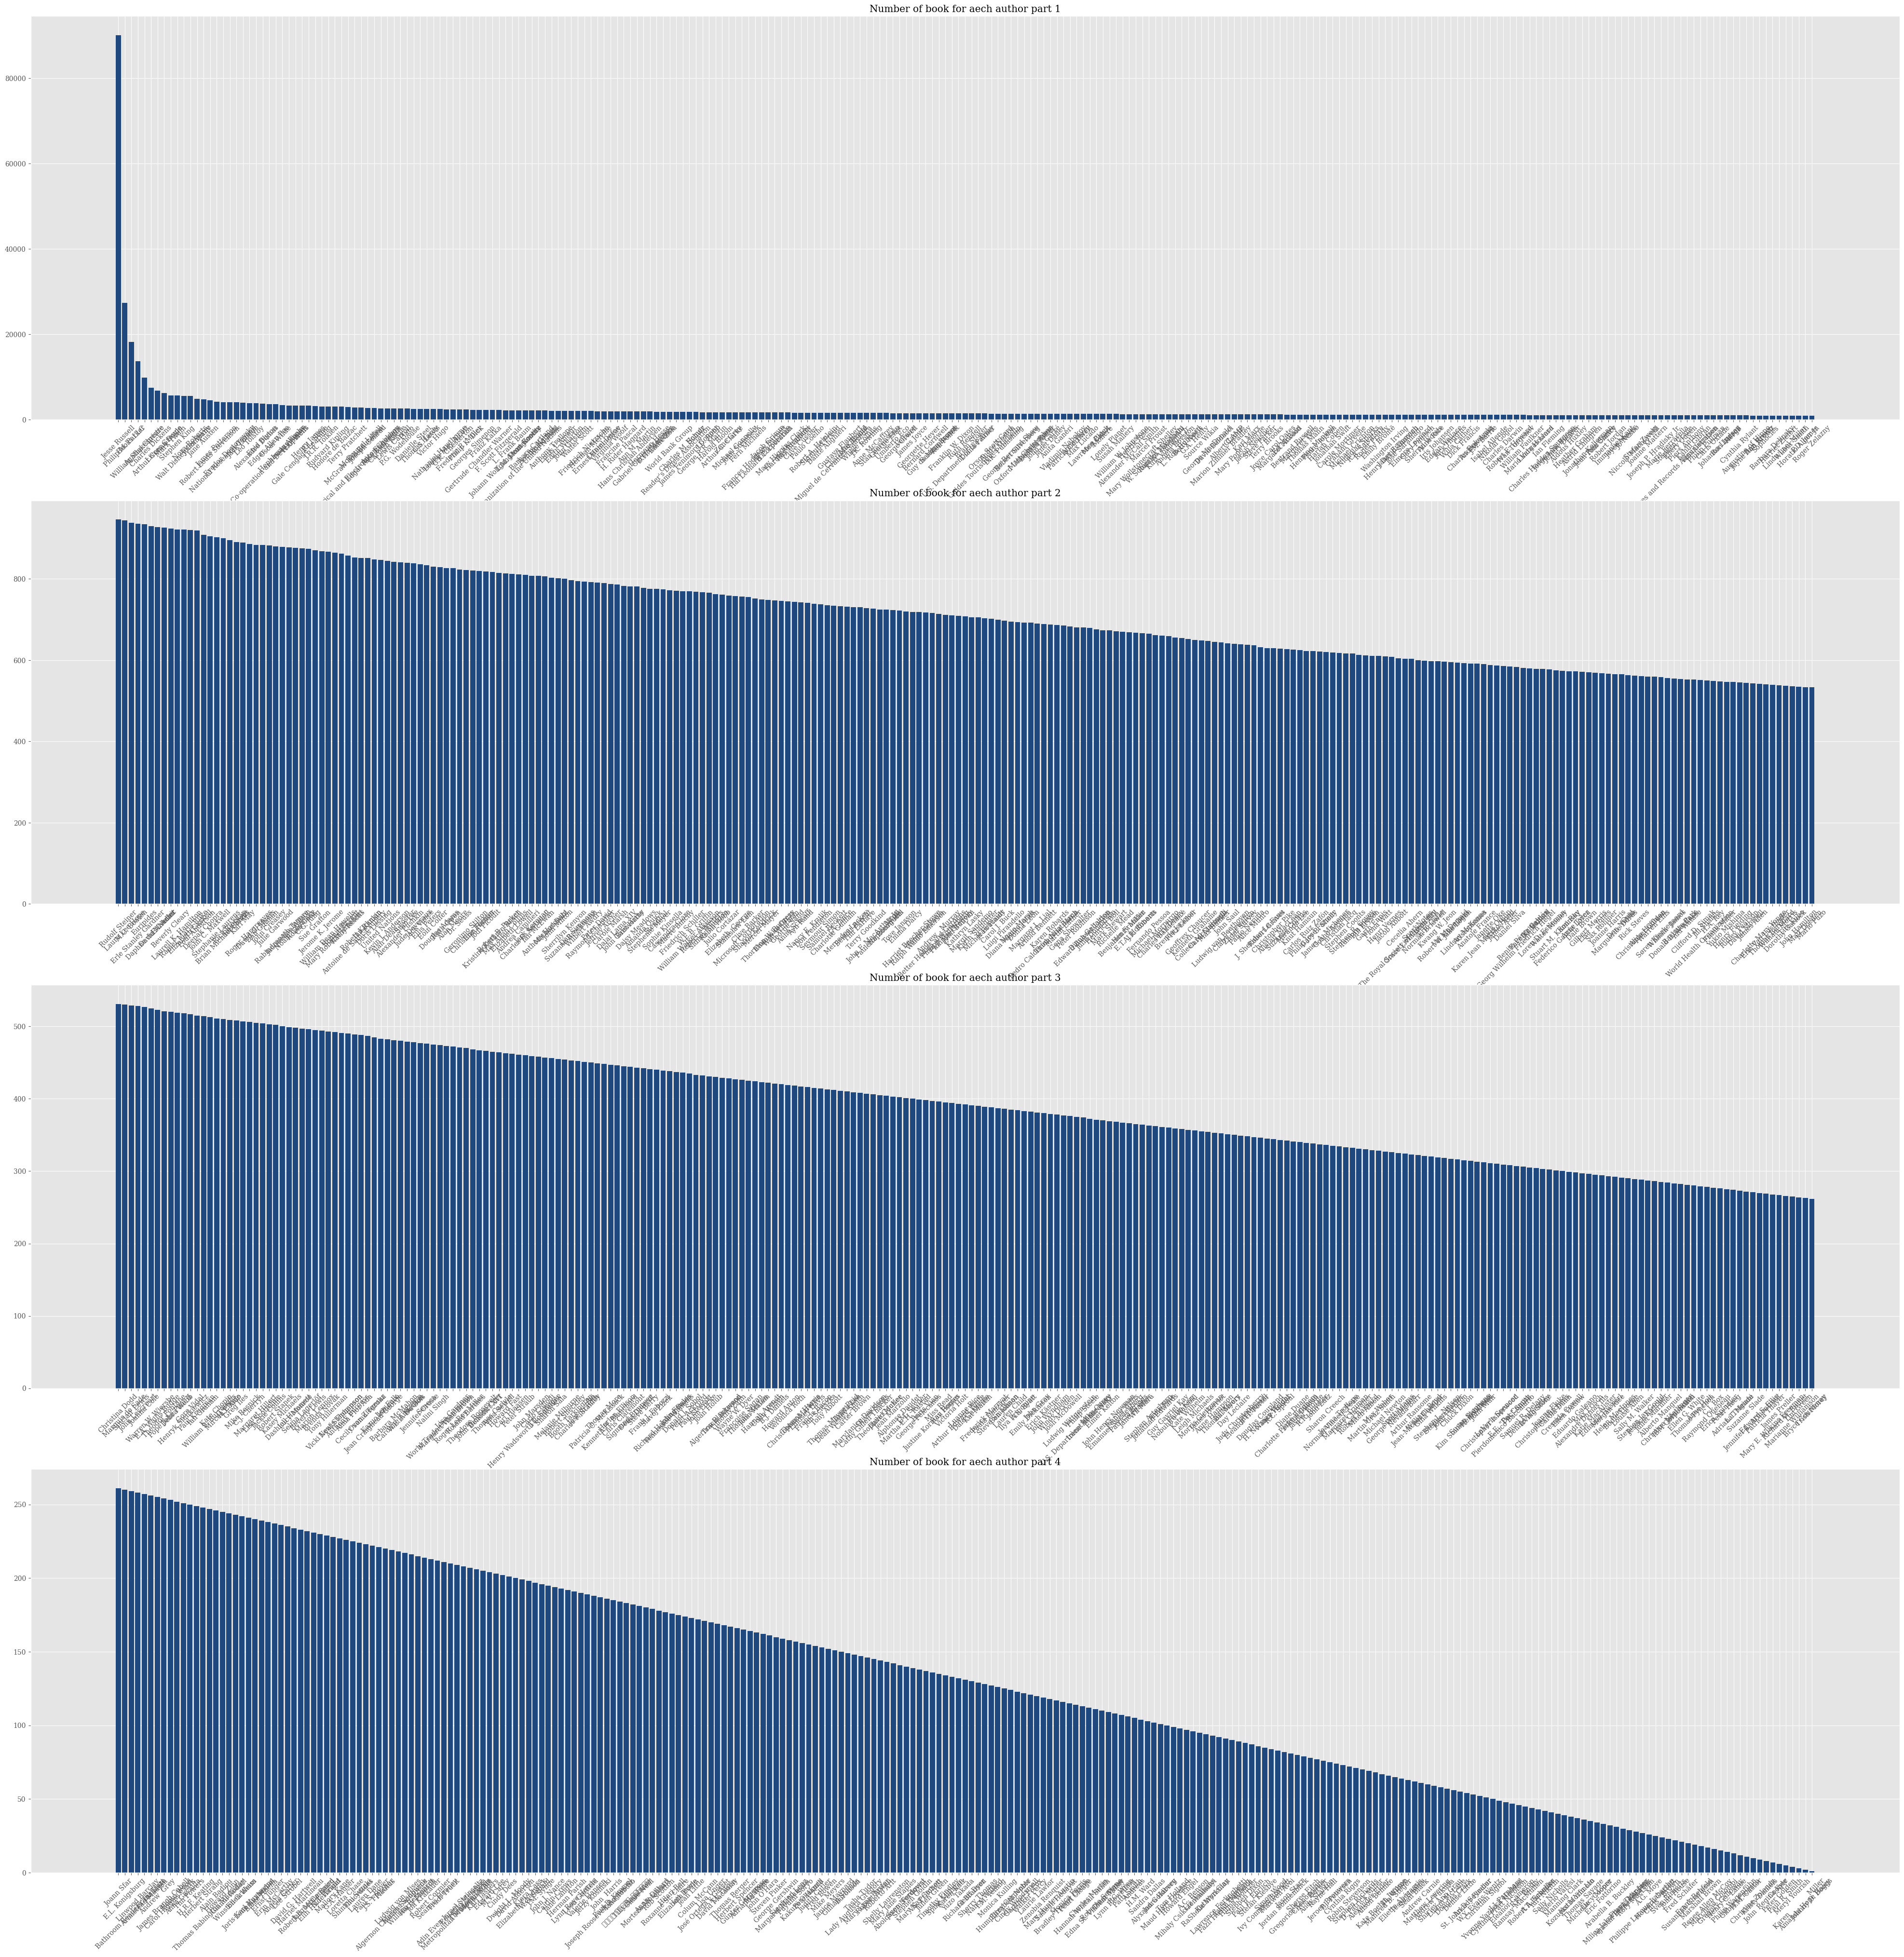

In [24]:
divised = division_data(freq_authors_sample,4)
fig, axes = plt.subplots(len(divised), 1, figsize=(50, 50)) # we avoid sharey = True  bacause all the other graphs would be not visible 
for i,data in enumerate(divised):
    ax = axes[i]
    ax.bar(data["author_name"],data["count"])
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(f"Number of book for aech author part {i + 1}")

### Second attempt: draw a sample of n = 30 and plot the results

In [25]:
freq_authors_sample_2 = freq_authors_sample.sample(30).sort_values(by="count", ascending=False)

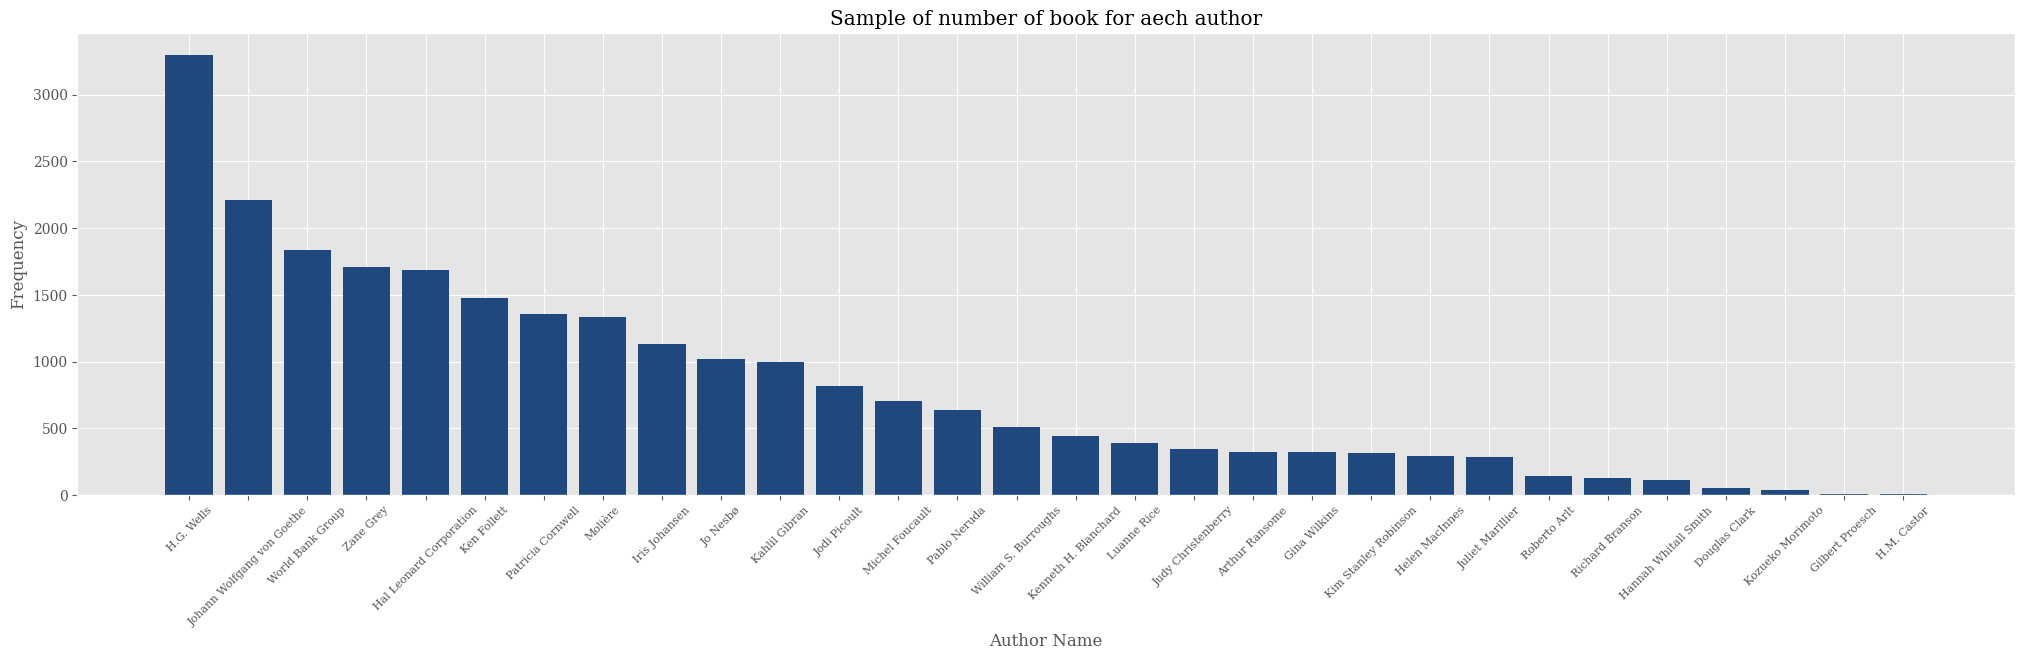

In [26]:
plt.figure(figsize=(25,6))
plt.xticks(rotation = 45, fontsize = 8)
plt.bar(freq_authors_sample_2["author_name"], freq_authors_sample_2["count"])
plt.title("Sample of number of book for aech author")
plt.xlabel("Author Name")
plt.ylabel("Frequency")
plt.show()

- Which book has the highest number of reviews?

In [27]:
max_rating_count = spark.sql("SELECT MAX(ratings_count) FROM lighter_books").toPandas()
max_rating_count = max_rating_count["max(ratings_count)"][0]
book_highest_review = spark.sql(f"SELECT title FROM lighter_books WHERE ratings_count == {max_rating_count}").toPandas() 
#put the f to incorporate max_rating_count inside the query
book_highest_review["title"][0]

'Harry Potter und der Stein der Weisen (Harry Potter,#1)'

- Which are the top ten and ten worst books concerning the average score?

In [10]:
df_lighter_books = df_lighter_books.filter(trim(col("average_rating")) != "") # removes rows with empty average rating
df_lighter_books = df_lighter_books.dropna(subset=["average_rating"])

In [29]:
average_score_10_worse = spark.sql("SELECT title, average_rating FROM lighter_books ORDER BY average_rating LIMIT 10").toPandas() #5 minutes to run
average_score_10_worse

title  average_rating
0                                   Intimate Worship             0.0
1  Bible in Spoken Word Cassette Narrated by Char...             0.0
2                             סופרים יהודיים - כתבים             0.0
3  Classic Fairy Stories: Traditional Tales: Trad...             0.0
4                                      Death of Aunt             0.0
5                                Hindi New Testament             0.0
6  NOT A BOOK: Ithaca, Tompkins County, New York:...             0.0
7                  Costa Rica, pura vida. Volumen II             0.0
8  Faith, Hope, and Luck Participant's Guide, Ses...             0.0
9                                 American Headway 1             0.0

In [30]:
average_score_10_best = spark.sql("SELECT title, average_rating FROM lighter_books ORDER BY average_rating DESC LIMIT 10").toPandas()
average_score_10_best

title  average_rating
0                                            Встречи             5.0
1                                               Wind             5.0
2  The Revolutionary Art of the Future: Rediscove...             5.0
3                                    Out of My Hands             5.0
4                            Nirvana Drum Collection             5.0
5  Perfect Italian (Learn Italian with the Michel...             5.0
6                                      The Long Dive             5.0
7  Los Many Mundos of Raulrsalinas: Un Poetic Jaz...             5.0
8  De Gaulle and the United States: A Centennial ...             5.0
9                Precious Moments: Autumn Adventures             5.0

In [11]:
df_lighter_books = df_lighter_books.filter(trim(col("language")) != "") # removes rows with empty language
df_lighter_books = df_lighter_books.dropna(subset=["language"])

- Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

In [32]:
df_languages = df_lighter_books.groupBy("language").count().toPandas()

In [33]:
df_languages = df_languages.sort_values(by="count", ascending=False)
df_languages
# There are 301 different languages!

language   count
49       eng  884148
91       ita   98654
104      ger   91486
96       spa   90072
0        fre   76737
..       ...     ...
8        tuk       1
166      bat       1
224      men       1
222      tut       1
300      sam       1

[301 rows x 2 columns]

English is the predominant language in the dataset, we decided to use a pie chart to represent it because visually it is the one that makes it clear which language is the most widely used.  
We did not put all the languages in the chart because some occupy too small slices of the chart, we stopped at the top 30 most widely used languages.

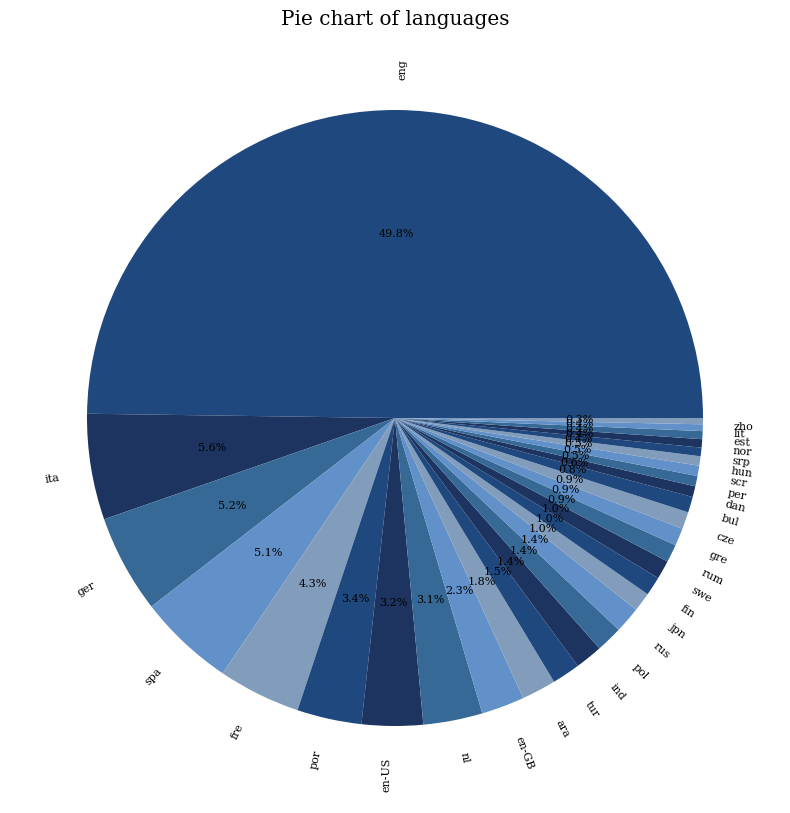

In [34]:
plt.figure(figsize=(10,10))
plt.pie(df_languages["count"].head(30), labels= df_languages["language"].head(30), autopct='%1.1f%%', rotatelabels= True,  textprops={'size': 8} )
plt.title("Pie chart of languages")
plt.show()

- How many books have more than 250 pages?

In [35]:
books_more_250 = spark.sql(" SELECT COUNT(*) FROM lighter_books WHERE num_pages > 250").toPandas()

In [36]:
print("There are", books_more_250["count(1)"][0], " with more taht 250 pages")

There are 1668596  with more taht 250 pages


- Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

In [37]:
prolific_50_fans = spark.sql("""
    SELECT name, fans_count
    FROM lighter_authors 
    WHERE name IN (SELECT author_name
                   FROM lighter_books
                   GROUP BY author_name
                   ORDER BY COUNT(*) DESC)
    ORDER BY fans_count DESC
    LIMIT 50
""")

In [38]:
prolific_50_fans_df = prolific_50_fans.toPandas()

In [39]:
prolific_50_fans_df.head(5)

name  fans_count
0     Stephen King      766035
1    Veronica Roth      455358
2   Colleen Hoover      356633
3     Rick Riordan      339346
4  James Patterson      317040

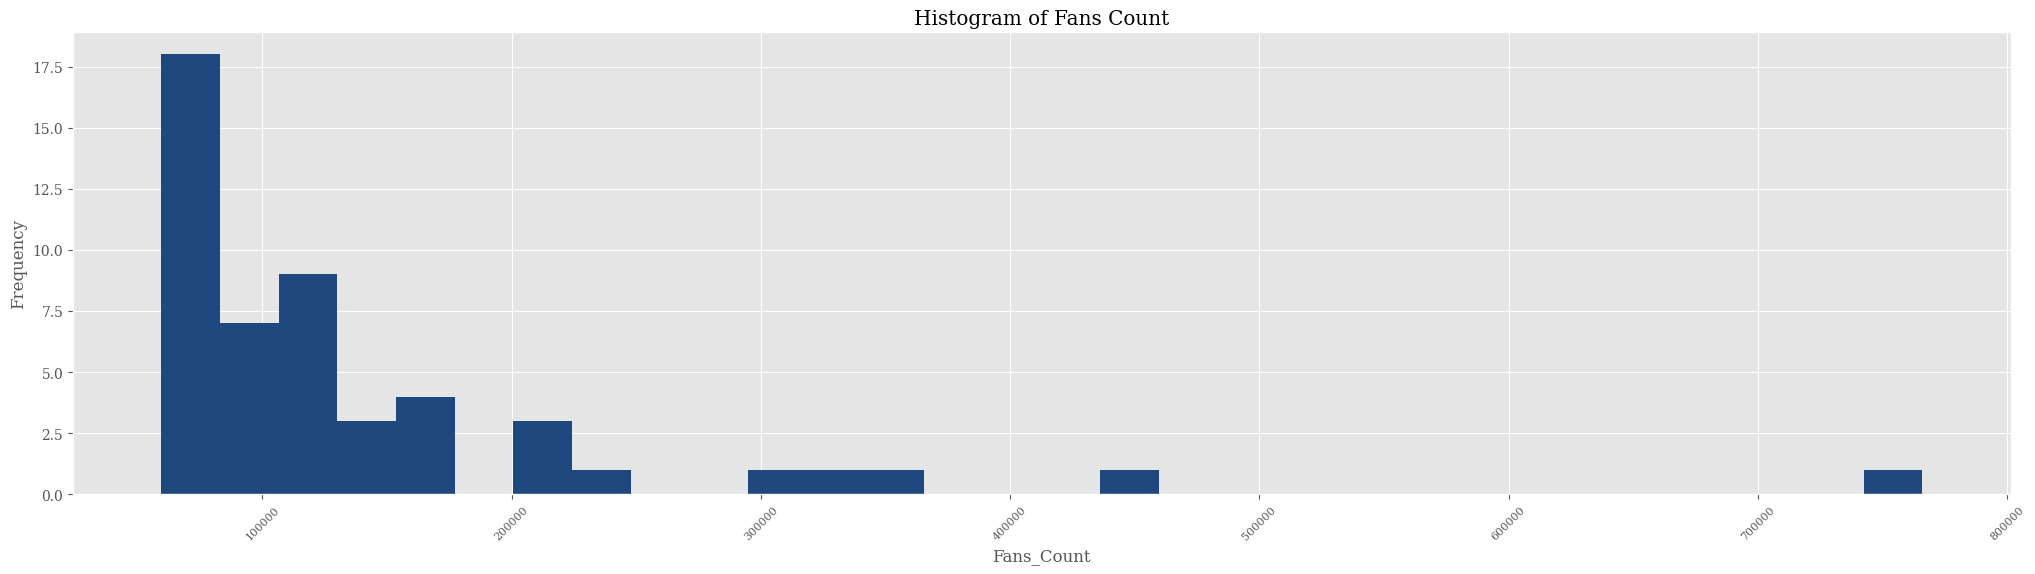

In [40]:
# Usually a histogram is the right method to represent the distribution of a variable but in this case the fans_count cannot be considered 
# a continuous variable and in fact the histogram has "holes" in it. 
plt.figure(figsize=(25, 6))
plt.xticks(rotation=45, fontsize=8)
plt.hist(prolific_50_fans_df["fans_count"], bins=30)  
plt.xlabel("Fans_Count") 
plt.ylabel("Frequency")  
plt.title("Histogram of Fans Count")  
plt.show()

Text(0.5, 1.0, 'Barplot of Fans Count')

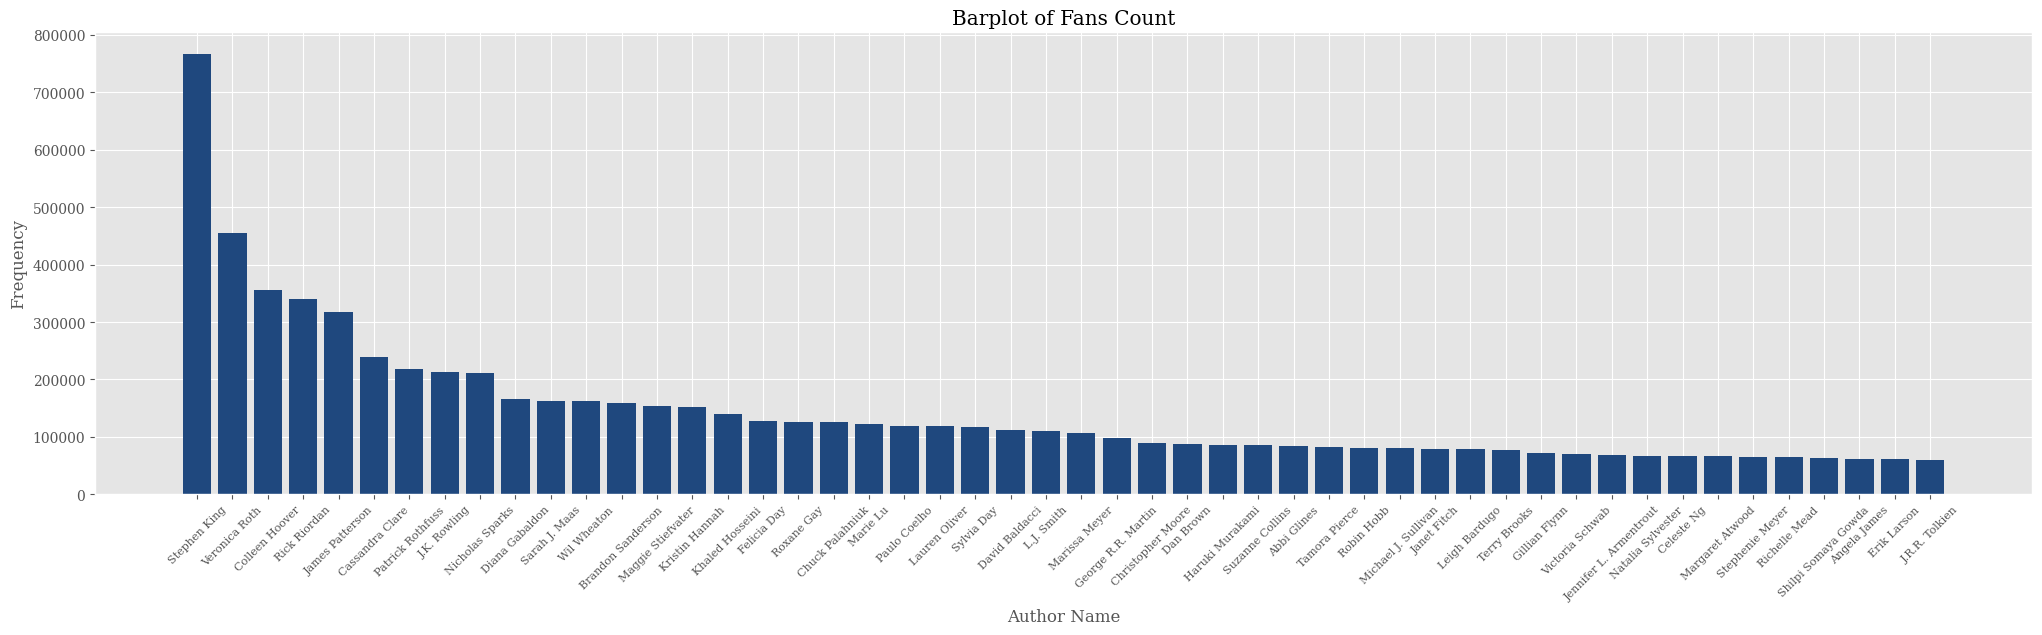

In [41]:
#Therefore, to have a graph that better represents the distribution of fans for the 50 most prolific authors, one can use a barplot
plt.figure(figsize=(25,6))
plt.xticks(rotation = 45, fontsize = 8)
plt.bar(prolific_50_fans_df["name"], prolific_50_fans_df["fans_count"])
plt.ylabel("Frequency")
plt.xlabel("Author Name")
plt.title("Barplot of Fans Count")

# [RQ8] Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

- Can you demonstrate that readers usually rate the longest books as the worst?

It seems from the research question that we are looking for whether there is a negative correlation between the number of pages a book has and the average number of reviews it has received. What we come up with is to do a scatterplot of the two variables and see if it is possible to make a regression line that has a negative angular coefficient.
We are considering both the number of pages and the average number of reviews as continuous quantitative variables. 
We also calculate the correlation between the two variables and see if the results we find graphically and with the formulas are consistent with our hypotheses. 
We can also do a Pearson test to see if the correlation is significant.

In [12]:
df_lighter_books = df_lighter_books.filter(trim(col("num_pages")) != "") # removes rows with empty language
df_lighter_books = df_lighter_books.filter(trim(col("average_rating")) != "")
df_lighter_books = df_lighter_books.dropna(subset=["num_pages","average_rating"])

In [43]:
pages_and_ratings = df_lighter_books.select("num_pages","average_rating").toPandas() #takes 5 minutes to run

In [44]:
np.max(pages_and_ratings["num_pages"])
np.quantile(pages_and_ratings["num_pages"], q = 0.999) #we use this quantile to esclude number of pages too big

2024.0

In [45]:
filtered_pages_and_ratings = pages_and_ratings[pages_and_ratings["num_pages"] < np.quantile(pages_and_ratings["num_pages"], q = 0.999)]

Text(0, 0.5, 'Average Rating')

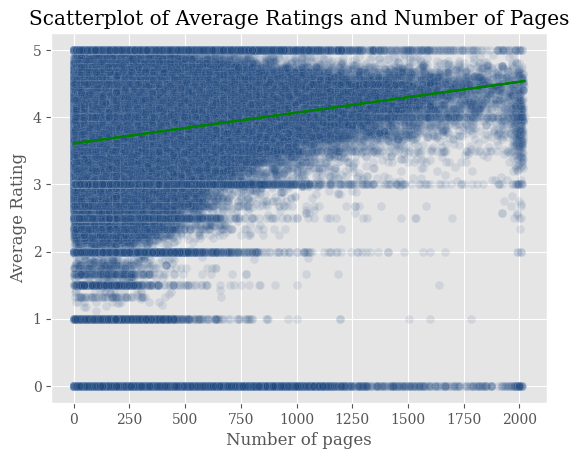

In [46]:
plt.scatter(filtered_pages_and_ratings["num_pages"], filtered_pages_and_ratings["average_rating"], alpha=0.1, edgecolors = 'lightsteelblue')

slope, intercept = np.polyfit(filtered_pages_and_ratings["num_pages"], filtered_pages_and_ratings["average_rating"], 1)
plt.plot(filtered_pages_and_ratings["num_pages"], slope*filtered_pages_and_ratings["num_pages"]+intercept, color = "green") 
plt.title("Scatterplot of Average Ratings and Number of Pages")
plt.xlabel("Number of pages")
plt.ylabel("Average Rating")

In [16]:
pages_and_ratings_2 = df_lighter_books.filter((df_lighter_books["ratings_count"] >= 1000) & (df_lighter_books["num_pages"] >= 250)).select("num_pages", "average_rating").toPandas()

In [17]:
filtered_pages_and_ratings_2 = pages_and_ratings_2[pages_and_ratings_2["num_pages"] < np.quantile(pages_and_ratings_2["num_pages"], q = 0.999)]

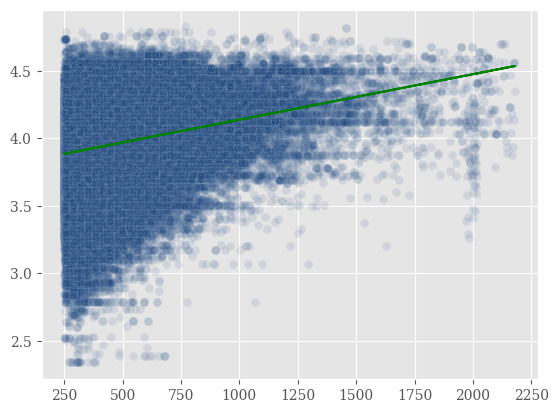

In [19]:
plt.scatter(filtered_pages_and_ratings_2["num_pages"], filtered_pages_and_ratings_2["average_rating"], alpha=0.1, edgecolors = 'lightsteelblue') #takes 

slope, intercept = np.polyfit(filtered_pages_and_ratings_2["num_pages"], filtered_pages_and_ratings_2["average_rating"], 1)
plt.plot(filtered_pages_and_ratings_2["num_pages"], slope*filtered_pages_and_ratings_2["num_pages"]+intercept, color = "green") 

In [21]:
from scipy import stats

In [22]:
rho = stats.pearsonr(filtered_pages_and_ratings_2["num_pages"], filtered_pages_and_ratings_2["average_rating"])
r = rho[0]

# What do we expect? From the plot shown above, is clear that there is some linear relationship... so we expect to see a rho that is not too high.
# At the same time we know that our sample size is very big... it is almost an asymptotic! So we expect to see a p-value really really low...

p_value = rho[1]

# And in fact:

print('The Pearson correlation coefficient is', r)
print('The corrisponding p-value is', p_value)

The Pearson correlation coefficient is 0.22477413912492766
The corrisponding p-value is 0.0


The scatterplot did not yield the result we hoped for, so to try to show that reviews become negative for books with many pages we try to turn average rating into a dichotomous variable and try to use a logistic regression

In [26]:
threshold = 3.5  # Under 3.5 is a bad rating
# New column "rating_binary"
df_lighter_books = df_lighter_books.withColumn("rating_binary", when(df_lighter_books["average_rating"] >= threshold, 1).otherwise(0))

In [27]:
pages_and_Binary = df_lighter_books.select("num_pages", "rating_binary").toPandas()

In [38]:
pages_and_binary_filtered = pages_and_Binary[pages_and_Binary["num_pages"] <=  np.quantile(pages_and_Binary["num_pages"], q = 0.999)] #filtering the data

In [47]:
from sklearn.linear_model import LogisticRegression
X = pages_and_binary_filtered["num_pages"].values.reshape(-1, 1)
y = pages_and_binary_filtered["rating_binary"].values

# Create and fit a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)

# Plot the logistic curve
y_prob = logistic_reg.predict_proba(X)[:, 1]

In [53]:
intercept = logistic_reg.intercept_[0]
coefficient = logistic_reg.coef_[0][0]
print("The coefficient of the logistic regression is:", coefficient)

In [49]:
plt.rcParams['agg.path.chunksize'] = 10000 #searched online after an error, is for visualizing lot of points

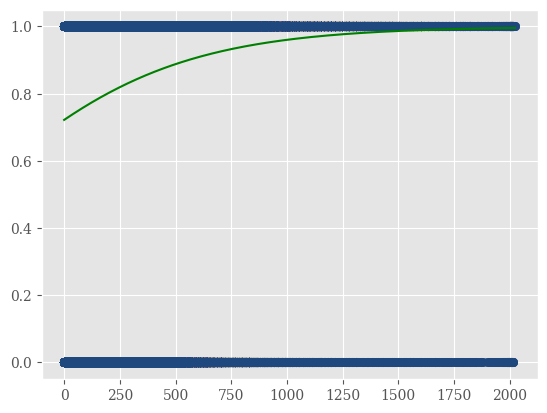

In [57]:
X_curve = np.linspace(min(X), max(X), 300).reshape(-1, 1)

y_prob_curve = logistic_reg.predict_proba(X_curve)[:, 1]

plt.scatter(X, y, alpha=0.6)
plt.plot(X_curve, y_prob_curve, color="green")

After our attempts we can conclude that there is no negative correlation or a negative relationship between the two variables. Although linear regression summarized the behavior of the data well, with logistic regression we create a curve that seems to follow the pattern of the scatterplot better. <br>
We therefore conclude that as the number of pages increases the reviews are higher, perhaps, after reading a really long book one tends to review it well, if the reader does not like the book maybe he stops reading it before finishing it and does not review it at all.

- Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?


In [13]:
# From the pie-chart of the languages we have seen that most of the books are english book but if we look at the other categories we can see that there are also "en-US" and "en-GB"
# and we will put them together with "eng".
# So we want to construct a new column with English and Non-English books
df_lighter_books = df_lighter_books.withColumn("language_standard", when(col("language").isin("en-US", "en_GB", "eng"), "eng").otherwise("non-eng"))
df_languages_standard = df_lighter_books.select("title","language_standard","average_rating").toPandas()
# Now our data is ready

In [14]:
df_languages_standard["language_standard"].value_counts()
# So our population is composed by 812523 non-eng books and 770773 eng books.

non-eng    812523
eng        770773
Name: language_standard, dtype: int64

To compare the distribution of the average rating for English lirbs and non-English books, the T-test can be used.
It is a test-parametric test used to determine whether there is a statistically significant difference between the means of two distributions. The t-test is based on three assumptions:
1) independent samples
2) data with approximately normal distribution
3) homogeneity of variance

However, the t-test is robust in case the data are not normal but works well usually for small samples.

In our case the samples are independent because they are drawn from two different subpopulations, we can leave out the normality in the t-test and go to calculate the population variance, np.var calculates the population variance, in this case we do not need the sample variance because we have the whole population available. However from the point of view of time and calculations we often use the sample variance and use samples from the population.

In [15]:
import random
from scipy import stats
random.seed(42)

# Sample the data
eng_ratings = random.sample(df_languages_standard[df_languages_standard["language_standard"] == "eng"]["average_rating"].tolist(), 1000)
non_eng_ratings = random.sample(df_languages_standard[df_languages_standard["language_standard"] == "non-eng"]["average_rating"].tolist(), 1000)
print(np.var(eng_ratings))
print(np.var(non_eng_ratings))
# our variances do not differ much, and so we can use the equal_var = True argument of the t-test
t_stat, p_value = stats.ttest_ind(eng_ratings, non_eng_ratings, equal_var=True)  # Assuming equal variances and the default method is two-sided
print("The value of the t statistics is:", t_stat, "and the value of the p-value is: ", p_value)

0.7931538774999999
0.5778219951
The value of the t statistics is: -0.4610581512906193 and the value of the p-value is:  0.6448070679699869


From the result of the t-test, the p-value is greater than 0.05, so we accept the null hypothesis. Therefore, there does not seem to be a significant difference between the means of the two distributions.

We do not stop our analysis here because we have so much data available, and the t-test is usually used on small samples; an alternative to the t-test is the z-test, which precisely is used when the sample size is high.
The z-test has as assumptions that:
1) The data are normal
2) The samples are independent
3) The variance is known
4) the sample size is large

In the literature we do not find as for the t-test the confidence that the test performs well even if the data is not normal so we have to verify it, we can do it either with a test or graphically.

Kolmogorov-Smirnov statistic for eng_rating: 0.9472074376523145
P-Value for eng_rating: 0.0
Kolmogorov-Smirnov statistic for non_eng_rating: 0.9609754114572416
P-Value for non_eng_rating: 0.0


Text(0, 0.5, 'Frequency')

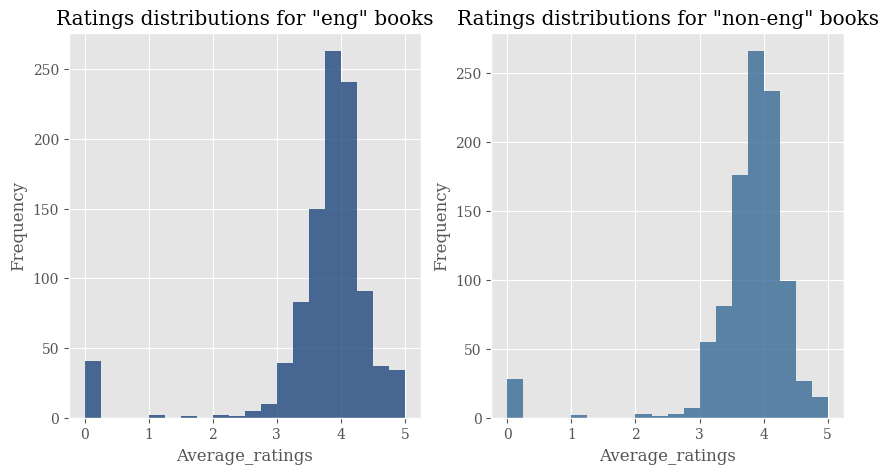

In [16]:
from scipy import stats

stat, p = stats.kstest(eng_ratings, 'norm')
print("Kolmogorov-Smirnov statistic for eng_rating:", stat)
print("P-Value for eng_rating:", p)

stat_n, p_n = stats.kstest(non_eng_ratings, 'norm')
print("Kolmogorov-Smirnov statistic for non_eng_rating:", stat_n)
print("P-Value for non_eng_rating:", p_n)

# Both p-value are under 0.05 so our samples are not normally distributed...
# We can check it also graphically

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(eng_ratings, bins=20, alpha=0.8, label='eng', color = our_colors[0] )
axes[0].set_title('Ratings distributions for "eng" books')
axes[0].set_xlabel('Average_ratings')
axes[0].set_ylabel('Frequency')

# Plot per la distribuzione dei dati del gruppo "non-eng"
axes[1].hist(non_eng_ratings, bins=20, alpha=0.8, label='non-eng', color = our_colors[2])
axes[1].set_title('Ratings distributions for "non-eng" books')
axes[1].set_xlabel('Average_ratings')
axes[1].set_ylabel('Frequency')


As we can see both graphically and with the test, we cannot assume that the sample data are normal. Therefore, we are not going to use the Z-test. <br>
From the graph we also see that the shape of the two distributions is almost the same, maybe the t-test we did is attentible but we still choose to do a nonparametric test as well such as the Wilcoxon-Mann-Whitney test. With a nonparametric test we make no assumptions about the distribution of the data, we will still get a test statistic and p-value but for example we will not have the confidence intervals.

We then go on to explore the test of Wilcoxon which is a non-parametric statistical test used to compare the medians of two groups. <br>
The test assumptions are:
1) The observations from the two groups should be randomly selected from the target populations.
2) Observations are independent of each other.
3) Observations should be continuous or ordinal. 

The null hypothesis is that the distribution of non-english average ratings books is the same as the distribution of english average ratings book.

In [17]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(eng_ratings, non_eng_ratings)
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 512281.0
p-value: 0.34154855244878934


So even the nonparametric test gives a p-value greater than 0.05 so we accept the null hypothesis and conclude that there is no statistically significant difference between the two groups. <br>

Therefore, going beyond statistical significance we can conclude that there is no clear evidence to be able to say that language affects the distribution of average ratings, so the fact that a book is written in English or in another language does not significantly change the grade the reader will give the book. <br>
Should one wish to make a more accurate analysis of the average rating of books written in English or another language one would also need to consider other factors besides the distribution of the average rating itself such as the genre of the book, the writer, and even the audience itself being considered. 

- About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

In [18]:
eng = df_languages_standard[df_languages_standard["language_standard"] == "eng"]["average_rating"]
non_eng = df_languages_standard[df_languages_standard["language_standard"] == "non-eng"]["average_rating"]

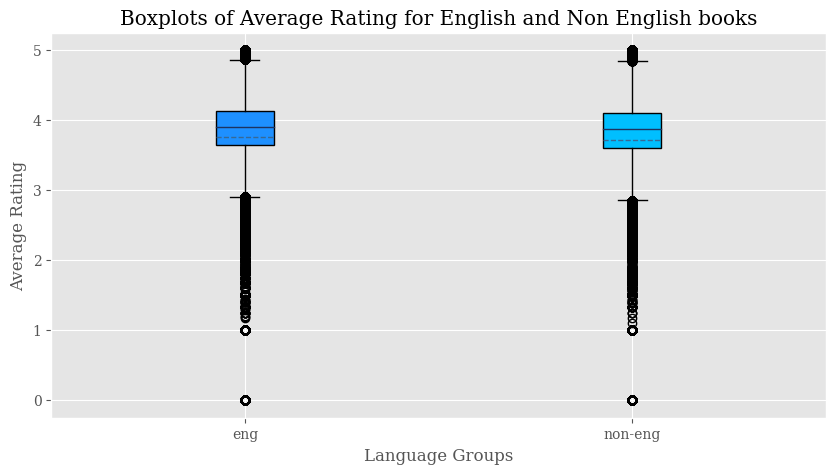

English books: 
 Mean: 3.7536994679367313 
 Mode: 4.0 
 Median: 3.91 
 First Quartile:  3.64 
 Third Quartile:  4.13

Non English books: 
 Mean: 3.7176398206573826 
 Mode: 4.0 
 Median: 3.88 
 First Quartile:  3.6 
 Third Quartile:  4.1


In [19]:
from statistics import mode
fig, ax = plt.subplots(figsize=(10, 5))

bplot1 = ax.boxplot(eng, positions=[1], labels=["eng"], patch_artist=True, showmeans=True, meanline = True)
bplot2 = ax.boxplot(non_eng, positions=[2], labels=["non-eng"], patch_artist=True, showmeans=True, meanline = True)
ax.set_xlabel('Language Groups')
ax.set_ylabel('Average Rating')

for box, color in zip(bplot1['boxes'], ['dodgerblue']):
    box.set_facecolor(color)

for box, color in zip(bplot2['boxes'], ['deepskyblue']):
    box.set_facecolor(color)
plt.title("Boxplots of Average Rating for English and Non English books")
plt.show()


print("English books:", "\n", "Mean:" ,np.mean(eng), "\n","Mode:", mode(eng),"\n", "Median:" ,np.median(eng), "\n", "First Quartile: ", np.quantile(eng,q=0.25), "\n", "Third Quartile: ", np.quantile(eng,q=0.75))
print()
print("Non English books:", "\n", "Mean:" ,np.mean(non_eng), "\n","Mode:", mode(non_eng),"\n", "Median:" ,np.median(non_eng), "\n", "First Quartile: ", np.quantile(non_eng,q=0.25), "\n", "Third Quartile: ", np.quantile(non_eng,q=0.75))

We modified the boxplot to also show the mean using the showmean argument; the mean is the dotted line inside the box and in the classic boxplot it is not represented. <br>
The other line inside the boxplot represents the mean, the second quartile. <br> 
The first and third quartiles are the extremes of the box, and the size of the box represents the interquartile range. <br>
All the dots that we see are the values that are considered outliers, in fact if we look again at the book sample distribution graph we will see that most of the data are concentrated between 3 and 5 and therefore the boxplot considers all those it finds below the value 3 to be outlier data. <br>
The other two black horizontal lines represent the minimum and maximum value of the distribution. <br>
Having also displayed the mean in the boxplot we can also have additional information regarding the skewness of the distribution. When the mean is smaller than the median there is negative skewness i.e. the distribution has a long tail on the left, vice versa if the mean is larger than the median. <br>
If the mean and median do not coincide, it is also concluded that you do not have a normal distribution. <br>

The values for the two distriubutions we obtain are very similar, thus again confirming the results of the previous question.

- It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical   test or a predictive model.

In [26]:
# For this task we use the authors dataset and we clean a bit the data
df_lighter_authors = df_lighter_authors.filter(trim(col("name")) != "") # removes rows with empty name
df_lighter_authors = df_lighter_authors.filter(trim(col("fans_count")) != "") # removes rows with empty fans_count
df_lighter_authors = df_lighter_authors.filter((col("text_reviews_count") >= 0) & (col("fans_count") >= 0)) #removes negatives values
df_lighter_authors = df_lighter_authors.filter(trim(col("text_reviews_count")) != "") # removes rows with empty text_review_count
df_lighter_authors = df_lighter_authors.dropna(subset=["name","fans_count","text_reviews_count"])

In [29]:
fans_and_reviews = df_lighter_authors.select("name","fans_count","text_reviews_count").orderBy("fans_count", ascending=False).toPandas()
fans_and_reviews # well, Stephen King fans are not lazy!

name  fans_count  text_reviews_count
0                   Stephen King      766035              608956
1                  Veronica Roth      455358              277033
2                 Colleen Hoover      356633              240302
3                   Rick Riordan      339346              354145
4                James Patterson      317040              333220
...                          ...         ...                 ...
248369         Peter       Moore           0                   0
248370           Luise Zschöttge           0                   0
248371  Manuel Martínez Sospedra           0                   1
248372             Evelyn Wylder           0                   3
248373               Mukunda Das           0                   0

[248374 rows x 3 columns]

As with the first question to investigate whether there is some sort of relationship between fans_count and text_reviews_rating we can either rely on a correlation test or a predictive model such as linear regression. <br>
We can do both and see if the results are consistent.

In [40]:
np.max(fans_and_reviews["fans_count"]) #maximum level = 766035
fans_99 = np.quantile(fans_and_reviews["fans_count"], q = 0.99) # 99-th percentile = 1620
# we need to trim the data
np.max(fans_and_reviews["text_reviews_count"]) #maximum level = 608956
text_99 = np.quantile(fans_and_reviews["text_reviews_count"], q = 0.99) # 99-th percentile = 6538

In [42]:
# Filtering the data according with the quatiles of the distributions
filtered_fans_and_reviews = fans_and_reviews[(fans_and_reviews["fans_count"] <= fans_99) & (fans_and_reviews["text_reviews_count"] <= text_99)]

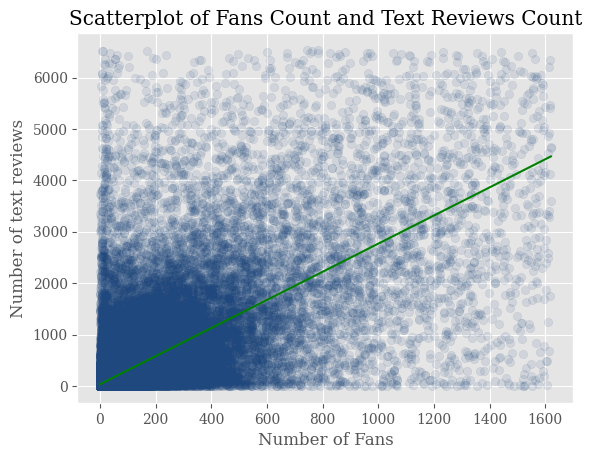

In [48]:
plt.scatter(filtered_fans_and_reviews["fans_count"], filtered_fans_and_reviews["text_reviews_count"], alpha=0.1)

slope, intercept = np.polyfit(filtered_fans_and_reviews["fans_count"], filtered_fans_and_reviews["text_reviews_count"], 1)
plt.plot(filtered_fans_and_reviews["fans_count"], slope*filtered_fans_and_reviews["fans_count"]+intercept, color = "green") 
plt.title("Scatterplot of Fans Count and Text Reviews Count")
plt.xlabel("Number of Fans")
plt.ylabel("Number of text reviews")
plt.show()
# Well... we have so much data that fitting a linear regression is not so helpfull, we can not say that from the scatter there is a perfect linear relation

In [62]:
# We can still try to do a predective linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set X and Y and split the data
X = filtered_fans_and_reviews[["fans_count"]]
y = filtered_fans_and_reviews["text_reviews_count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model_lm = LinearRegression()
# Train the model
model_lm.fit(X_train, y_train)
# Predictions
y_pred = model_lm.predict(X_test)
# Results
print("The R^2 value is:", round(r2_score(y_test, y_pred),3), "and the value of the coefficient is:", round(model_lm.coef_[0],3))

The R^2 value is: 0.499 and the value of the coefficient is: 2.735


To understand whether the model explains enough variance in the data, we can use R squared. <br>
It is a measure that is the proportion of the variation in the dependent variable (in this case text_reviews_count) that is predictable from the independent variable (in this case fans_count). <br>
Usually the values range from 0 to 1 where 1 corresponds to perfect predictions. In our case we obtained an R^2 of about 0.5 so the linear regression model cannot explain all the variance in the data. <br>
The coefficient we obtain is a positive coefficient and so as the variable "fans_count" increases by one unit we will see a positive increase in the variable "text_review_count" <br>
In this case we do not see the lazy behavior of fans, according to our model as the number of fans increases so do the number of reviews.

Let us also see the correlation value and whether this value is statistically signficant

We can use the Pearson correlation but it needs:
1) Normally distributed variables
2) Linear relation between the variables
3) There are not outliers

In our case we are assuming 2) and we checked the 3) using the quantiles of the distribution, we are not sure about the normality of our data, so we can do also the Spearmna correlation which is the same formula of Pearson Correlation but it is applied to the ranks of the variables and it is not parametric so we can skip the normality of the data.

In [63]:
rho = stats.pearsonr(filtered_fans_and_reviews["fans_count"], filtered_fans_and_reviews["text_reviews_count"])
r = rho[0]
p_value = rho[1]

print('The Pearson correlation coefficient is', r)
print('The corrisponding p-value is', p_value)
# The correlation is 0.7 so there is positive correlation between the variables and the coefficient is significative

The Pearson correlation coefficient is 0.7099858362419893
The corrisponding p-value is 0.0


In [66]:
rho = stats.spearmanr(filtered_fans_and_reviews["fans_count"], filtered_fans_and_reviews["text_reviews_count"])
r = rho[0]
p_value = rho[1]
print('The Spearman correlation coefficient is', r)
print('The corrisponding p-value is', p_value)

The Spearman correlation coefficient is 0.7656527137769905
The corrisponding p-value is 0.0


With both Spearman's and Pearson's correlation, we obtained that there is a positive correlation between the two variables.  We therefore conclude that authors with more fans do not have lazy fans and they therefore write a large number of reviews. <br>
However, it must be remembered that correlation does not imply causality.

We can then also do a statistical test by taking the 1000 most popular authors, and among the remaining authors another 1000 are sampled by simple random sampling without repetition.

Text(0, 0.5, 'Frequency')

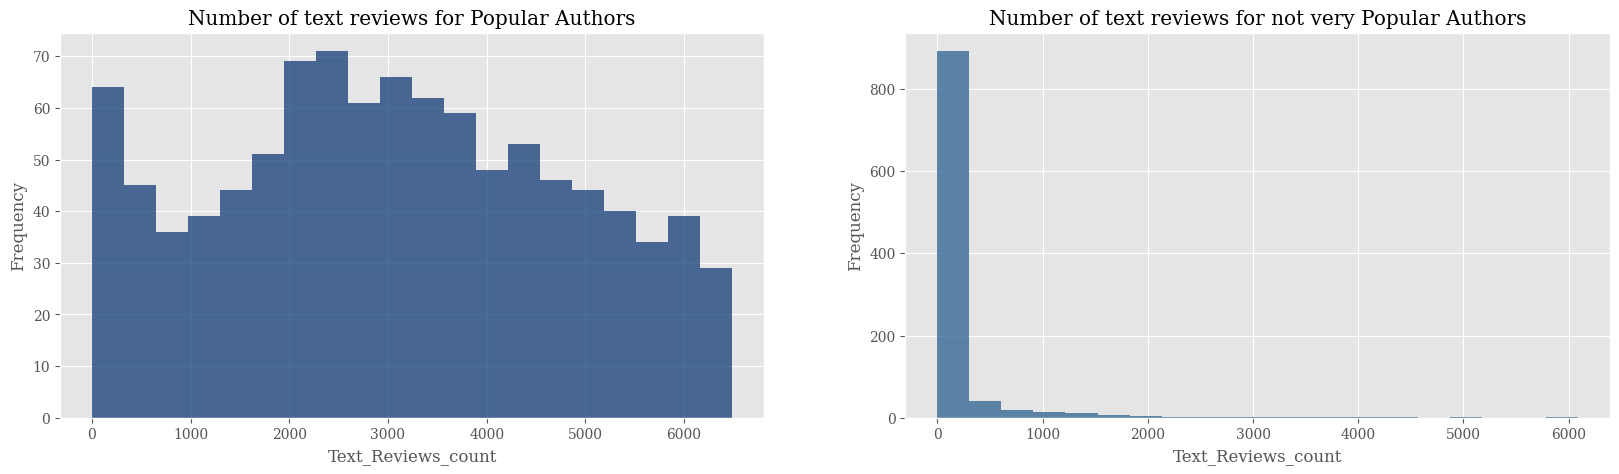

In [74]:
best_1000 = filtered_fans_and_reviews.head(1000) #Because the data is already ordered
remaining_rows = filtered_fans_and_reviews.drop(best_1000.index)
others_1000 = remaining_rows.sample(n=1000, random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].hist(best_1000["text_reviews_count"], bins=20, alpha=0.8, label='best', color = our_colors[0])
axes[0].set_title("Number of text reviews for Popular Authors")
axes[0].set_xlabel("Text_Reviews_count")
axes[0].set_ylabel('Frequency')

# Plot per la distribuzione dei dati del gruppo "non-eng"
axes[1].hist(others_1000["text_reviews_count"], bins=20, alpha=0.8, label='other_authors', color = our_colors[2])
axes[1].set_title("Number of text reviews for not very Popular Authors")
axes[1].set_xlabel("Text_Reviews_count")
axes[1].set_ylabel('Frequency')

# Well the distributions are very different, what about their means? Let's do the test.

We then do the test to compare the averages of the two groups, the standard test method has as the null hypothesis <br> 
H0 that there is no significant difference between the number of reviews ("text_reviews_count") between the "best_1000" group and the "others_1000" group <br>
while the alternative hypothesis <br> H1 is there is a significant difference between the number of reviews ("text_reviews_count") in the "best_1000" and "others_1000" groups" 
<br>
but it does not specify in which direction. It may be higher or lower.

In [76]:
statistic, p_value = mannwhitneyu(best_1000["text_reviews_count"], others_1000["text_reviews_count"], alternative="two-sided")

print("Statistic:", statistic)
print("p-value:", p_value)


Statistic: 967271.0
p-value: 5.829949649923864e-287


We then do the twosided test and have that our hypothesis are: <br>
H0: There is no significant difference between the number of reviews ("text_reviews_count") between the group "best_1000" and the group "others_1000" <br>
H1: The number of reviews ("text_reviews_count") in the "best_1000" group is significantly greater than the number of reviews in the "others_1000" group. 

In [80]:
statistic, p_value = mannwhitneyu(best_1000["text_reviews_count"], others_1000["text_reviews_count"], alternative="greater")
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 967271.0
p-value: 2.914974824961932e-287


In both tests the p-value is very small so we reject the null hypotheses and accept the alternative, there is then a difference between the two groups and we can now conclude that the number of reviews for authors who have more fans is greater than the number of reviews for authors who have fewer fans.

- Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

1) First we can ask ourselves, why use hypothesis tests? <br>
for example, when a statistician needs to make an estimate of a population parameter one starts by sampling a representative sample of the population, but once the parameter estimate (statistic) is obtained, how can one prove whether this parameter corresponds to the true parameter of the population that is, however, unknown? <br>
It will be necessary to make some assumptions and run the so-called hypothesis tests, so hypothesis testing is a statistical procedure that allows us to ask a question based on sample information in order to reach a statistically significant decision. <br>
The idea is that it always exists a situation which can be considered as the default, it is the null hypothesis H0. <br>
On the other hand, there is the alternative scenario, that, if accepted, will change the status: the Alternative Hypothesis H1 <br>
The goal is to assess whether the evidence from the sample provides enough support to reject the null hypothesis in favor of the alternative hypothesis. <br>

2) How to choose the hypothesis? <br>
The null hypothesis H0 is the one best accepted when you are unsure of your assumptions while the alternative hypothesis totally changes the scenario. <br>
In order to choose one's assumptions, it is necessary to introduce two main types of errors, the error of the first kind and the error of the second kind:
- Type I error, that is, mistakenly rejecting the null hypothesis, which was true, by accepting the alternative hypothesis. This error is also denoted by $\alpha$.
- Type II error, accepting the null hypothesis as valid, when it should have been rejected as false. This type of error is instead indicated with $\beta$. <br>
The error of the first type is the one considered the most important and therefore an attempt is made to minimize it. <br>
Typically $\alpha$ takes values of 0.05 i.e., the probability of wrongly rejecting the null hypothesis is 5% . The level of alpha also corresponds to the reliability of the test because the degree of confidence intervals is 1-$\alpha$ and thus is usually 95%. <br>
The 1-$\beta$ quantity, on the other hand, is known as the power of the test. <br>
Of course, the goal is to have as small errors as possible, but for the same sample size as alpha decreases the value of beta increases, so it is a trade-off between these two quantities. <br>

3) Type of hypothesis <br>
At this point we have chosen the test hypotheses and know that there are two types of errors, we have also chosen the alpha significance level. <br>
We then obtain the region of acceptance the region of rejection, calculate the test statistic and check whether its value falls within the region of acceptance or rejection. <br>
Hypothesis tests are being:
- one-sided, that is, when the rejection region consists of only one interval.
- bilateral, that is, when the rejection region consists of two intervals. <br>
Usually to tell whether you have a bilateral or unilateral test you need to look at the shape of the alternative hypothesis, if it contains symbols such as $>$ or $<$ it will be unilateral while with the symbol $\neq$ it is a bilateral test. <br>
Not only do you use the critical values of the test statistics to see whether or not you accept the null hypothesis but you can also use the p-value. If the p-value is less than alpha you reject the null hypothesis and accept the alternative hypothesis.

4) Parametric or not parametric test 
Parametric statistical methods are all methods that are based on probabilistic distributions such as the normal distribution or the student t distribution. <br> 
In contrast, non parametric are those that are not based on any probabilistic distribution. Thus in general, nonparametric tests should be preferred when the data do not distribute according to a normal, or in any case one is unable to prove it, for example, due to numerosity reduced. <br>
In terms of assumptions for making tests we have that
- parametric tests
    1) continuous variables
    2) assumption of normality of the data
    3) equal variance between groups (homoschedasticity)
- nonparametric tests
    1) any type of data
    2) no probabilistic assumptions about the distribution of the data
    3) variances across groups can be different
Parametric tests seem to be fine in any case, why then are they not used all the time? <br>
Because parametric tests are more sensitive and accurate and require smaller samples than nonparametric tests to achieve the same level of significativity.

5) Helpful statistical test <br>
We can make a table to summarize the test.

| **Purpose**                                                                                               | **Parametric test**      | **Non Parametric test**    |
|-----------------------------------------------------------------------------------------------------------|--------------------------|----------------------------|
| Test on a parameter of location (mean or median)                                                          | T-test                   | Wilcoxon Mann Whitney test |
| Determination of linear relationship between two variables                                                | Pearson correlation test | Spearman correlation test  |
| Test the hypothesis that two populations that both follow normal distributions have the same variance     | F-test                   | Kruskal - Wallis test      |
| Evaluate the differences between the averages of multiple groups                                          | ANOVA                    | Kruskal - Wallis test      |
| Determine whether the difference between a sample mean and a population mean is statistically significant | Z-test                   | Wilcoxon Mann Whitney test |